In [48]:
import experimentalStatistics as experimental
import changedStatistics as segmentation_stats
import plotting_funcs_thesis_edited as plot_funcs
import numpy as np
import pandas as pd
import csv
import os

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cycler
from matplotlib.ticker import FormatStrFormatter
import matplotlib.colors as colors

In [49]:
def HMM_Seg_Stats():
    """For every recording in the Levenstein data segmented using an HMM, calculate statistics and store in pandas dataframe"""
    
    # For every recording, get information and calculate stats, then store it:
    names_list = []
    mean_up_list = []
    cv_up_list = []
    mean_down_list = []
    cv_down_list = []
    ud_list = []
    du_list = []
    perc_up_list = []
    perc_down_list = []
    
    for root, dirs, files in os.walk('C:/Users/Shoshana/Documents/CSHL Summer/Data_CSVs/HMM_UpDownTimes'):
        if len(files) == 3:
            down_file = os.path.join(root, files[0])
            sws_file = os.path.join(root, files[1])
            up_file = os.path.join(root, files[2])
        
            mean_up, cv_up, mean_down, cv_down, ud, du, perc_up, perc_down = experimental.calculateStats(up_file, down_file, sws_file)
            name = root[66:]
        
            names_list.append(name)
            mean_up_list.append(mean_up)
            cv_up_list.append(cv_up)
            mean_down_list.append(mean_down)
            cv_down_list.append(cv_down)
            ud_list.append(ud)
            du_list.append(du)
            perc_up_list.append(perc_up)
            perc_down_list.append(perc_down)
    
    
    # Create the data frame:
    info_dict = {"Name": names_list, "meanUp": mean_up_list, "meanDown": mean_down_list, "cvUp": cv_up_list,  
                 "cvDown": cv_down_list, "SCC U->D": ud_list, "SCC D->U": du_list, "percUp": perc_up_list, "percDown": perc_down_list}
    HMM_Seg_Data = pd.DataFrame(info_dict)
    return HMM_Seg_Data
    

In [50]:
HMM_Seg_Data = HMM_Seg_Stats()
HMM_Seg_Data

,Name,meanUp,meanDown,cvUp,cvDown,SCC U->D,SCC D->U,percUp,percDown
0,20140526_277um,1.330781,0.205919,1.090007,1.105370,-0.111712,-0.088098,86.60,13.40
1,20140527_421um,3.635034,0.652275,1.199817,1.184276,-0.135117,-0.133876,85.06,14.94
2,20140528_565um,4.259625,0.741603,1.047473,1.070360,-0.028178,-0.030904,85.19,14.81
3,Bogey_012615,3.747282,0.468869,1.106525,1.162532,-0.072808,-0.088511,88.89,11.11
4,BWRat17_121912,8.582936,0.344583,1.124944,0.819781,-0.166623,-0.147922,96.15,3.85
5,BWRat19_032413,5.357875,2.002418,1.226866,1.776105,-0.165524,-0.155017,72.79,27.21
6,BWRat19_032513,2.883855,1.041412,1.079275,1.323572,-0.121058,-0.104474,73.51,26.49
7,BWRat20_101013,2.329898,0.335847,1.180429,1.006971,-0.101370,-0.077467,87.40,12.60


(-0.5, 0.5)

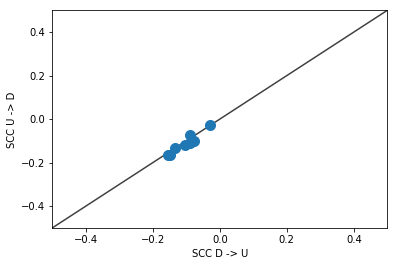

In [51]:
# SCC Plot

fig, ax = plt.subplots()
lims = [-0.5, 0.5]
plt.scatter(x = HMM_Seg_Data["SCC D->U"], y = HMM_Seg_Data["SCC U->D"], s = 100) 
plt.xlabel("SCC D -> U")
plt.ylabel("SCC U -> D")
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_xlim(lims)
ax.set_ylim(lims)

In [52]:
# Create a data frame of statistics used by the classifier

classifierData = pd.DataFrame.copy(HMM_Seg_Data)

classifierData["cvDiff"] = classifierData["cvUp"] - classifierData["cvDown"]
classifierData["sccDiff"] = classifierData["SCC U->D"] - classifierData["SCC D->U"]
classifierData.drop(labels = ["cvUp", "cvDown"], axis = 1, inplace = True)
classifierData.drop(labels = ["SCC U->D", "SCC D->U"], axis = 1, inplace = True)
classifierData.drop(labels = ["meanUp", "meanDown", "percDown"], axis = 1, inplace = True)

(-1, 1)

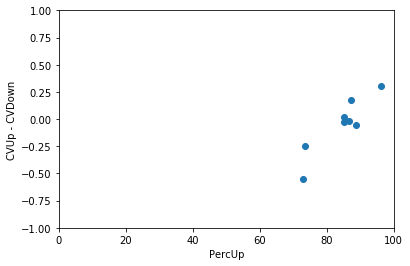

In [53]:
# CV diff and percUp plot

fig, ax = plt.subplots()
plt.scatter(x = classifierData["percUp"], y = classifierData["cvDiff"]) 
plt.xlabel("PercUp")
plt.ylabel("CVUp - CVDown")
#ax.plot([0, 0], [100, 0], 'k-', alpha=0.75, zorder = 0)
#ax.plot([50, -1], [50, 1], 'k-', alpha=0.75, zorder = 1)
ax.set_xlim([0, 100])
ax.set_ylim([-1, 1])